In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

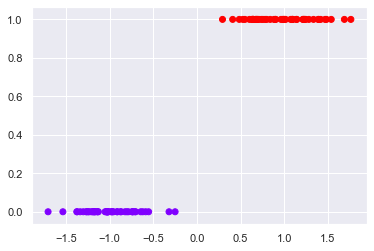

In [5]:
plt.scatter(x, y, c=y, cmap='rainbow')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [9]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
print(lr.coef_)
print(lr.intercept_)

[[3.19598186]]
[-0.12684127]


In [13]:
y_pred = lr.predict(x_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[ 8,  0],
       [ 0, 17]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score, f1_score

In [21]:
accuracy_score(y_test, y_pred)

1.0

In [23]:
f1_score(y_test, y_pred)

1.0

In [17]:
lr.predict_proba(x_test)

array([[0.98926555, 0.01073445],
       [0.02896074, 0.97103926],
       [0.97733874, 0.02266126],
       [0.92240874, 0.07759126],
       [0.89193251, 0.10806749],
       [0.96009883, 0.03990117],
       [0.00402989, 0.99597011],
       [0.96708625, 0.03291375],
       [0.04532521, 0.95467479],
       [0.04415724, 0.95584276],
       [0.10989092, 0.89010908],
       [0.01028788, 0.98971212],
       [0.03365099, 0.96634901],
       [0.02264054, 0.97735946],
       [0.96177804, 0.03822196],
       [0.04681957, 0.95318043],
       [0.14219128, 0.85780872],
       [0.08115566, 0.91884434],
       [0.04972563, 0.95027437],
       [0.2346863 , 0.7653137 ],
       [0.04225355, 0.95774645],
       [0.1742713 , 0.8257287 ],
       [0.12685803, 0.87314197],
       [0.30792128, 0.69207872],
       [0.98066706, 0.01933294]])

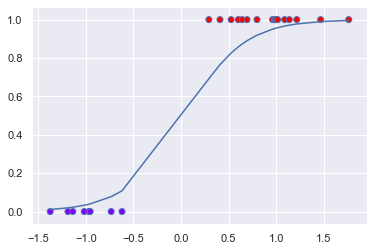

In [19]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')